In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord
from MyToolkit import *
import pandas as pd

In [13]:
DP2_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/"

### Here we plot the 592 PS1-ELQS quasars obtained from Schindler et al. 2019 in a mollweide projection sky map.

In [21]:
### Reading the PS1-ELQS Catalog from the shindler 2019 cds file
schind_file_name = DP2_DIRECTORY + "Data/apjsab20d0t7_mrt.txt"
schind_data = ascii.read(schind_file_name)
ra_col_schind = schind_data.columns[1]
dec_col_schind = schind_data.columns[2]

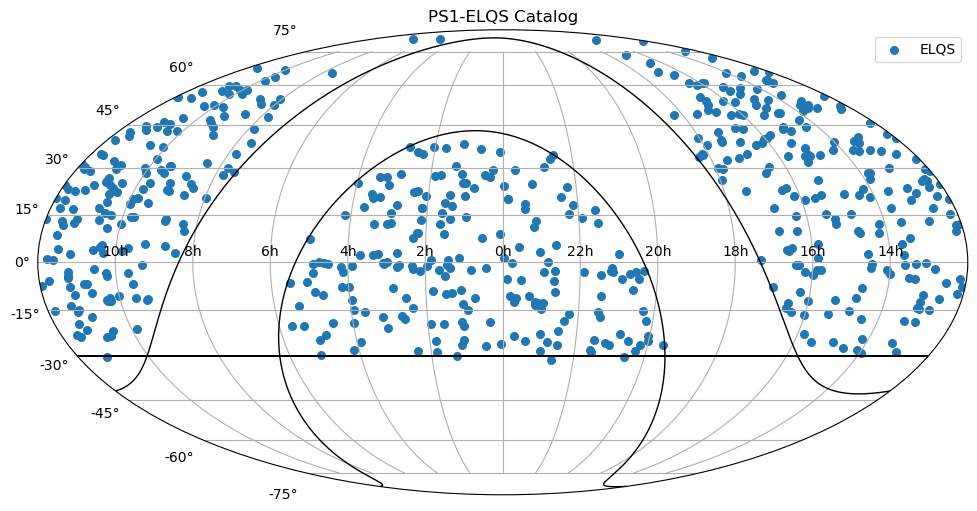

In [15]:
mask_schind = np.zeros_like(ra_col_schind, dtype= int)
mask = np.insert(mask_schind, 0, 1)
plot_sky_map_ps1(ra_col_schind, dec_col_schind, mask_schind, labels = ['ELQS'], title = "PS1-ELQS Catalog")

### Here we plot all known quasars (173) as of the end of 2016 march from Banados et al. 2016

In [16]:
### Reading the z > 5.6 quasar catalog of all known quasars as of the end of 2016 march from Banados et al. 2016
banados_file_name = DP2_DIRECTORY + "Data/apjsaa3870t7_mrt.txt"
banados_data = ascii.read(banados_file_name)
ra_col_ban = banados_data.columns[2]
dec_col_ban = banados_data.columns[3]
names_col_ban = banados_data.columns[0]
select_col_ban = banados_data.columns[8]
print("There are {} quasars in the catalog".format(len(ra_col_ban)))

There are 173 quasars in the catalog


In [17]:
def np_split(string):
    return string.split()[0]
v_np_split = np.vectorize(np_split, otypes=[str])
survey_names = v_np_split(names_col_ban)

mask_ban_pso = np.ones_like(ra_col_ban, dtype=int)
mask_ban_pso[np.where(survey_names == 'PSO')] = 0
mask_ban_pso = np.insert(mask_ban_pso, 0, 2)

In [43]:
mask_ban = np.zeros_like(ra_col_ban, dtype=int)
mask_ban[np.where(select_col_ban == 0)] = 1
mask_ban = np.insert(mask, 0 ,2)

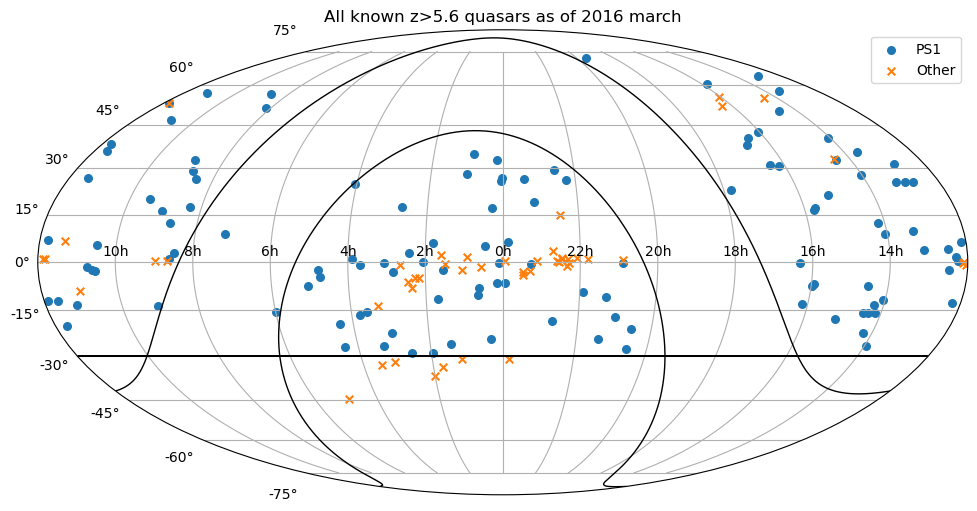

In [19]:

plot_sky_map_ps1(ra_col_ban, dec_col_ban, mask_ban, labels = ['PS1', 'Other'], title = "All known z>5.6 quasars as of 2016 march")

### Here we plot the full PS1 distant quasar sample as given in Schindler 2023

In [53]:
schind_23_file_name = DP2_DIRECTORY + "Data/apjaca7cat7_ascii.txt"
schind_23_data = open(schind_23_file_name, 'r')
ra_col_schind_23 = []
dec_col_schind_23 = []

skip_rows = 6
for line in schind_23_data:
    if (skip_rows > 0):
        skip_rows -= 1
        continue
    quasar_name = line.split()[0]
    ra_col_schind_23.append(float(quasar_name[4:13]))
    dec_col_schind_23.append(float(quasar_name[13:21]))

ra_col_schind_23 = np.array(ra_col_schind_23)
dec_col_schind_23 = np.array(dec_col_schind_23)

mask_schind_23 = np.zeros_like(ra_col_schind_23, dtype= int)
mask_schind_23 = np.insert(mask_schind_23, 0, 1)
print(np.shape(mask_schind_23))

(126,)


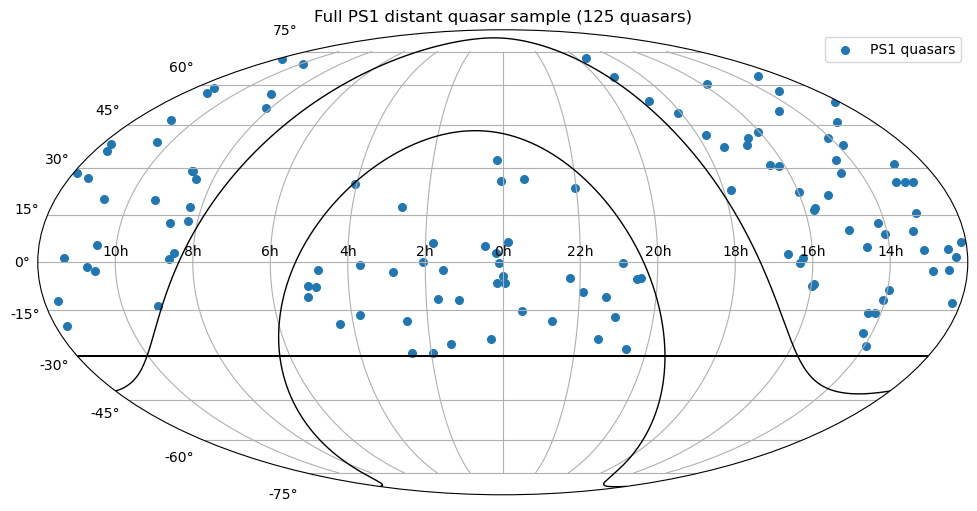

In [56]:
plot_sky_map_ps1(ra_col_schind_23, dec_col_schind_23, mask_schind_23, labels = ['PS1 quasars'], title="Full PS1 distant quasar sample (125 quasars)")